## 🎯 Project Title: Anomaly Detection in Credit Card Transactions

🧠 Project Goal:

Use unsupervised learning techniques to identify potential fraudulent credit card transactions without labeled data.

📦 Dataset:

Credit Card Fraud Detection – Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
data = pd.read_csv('data/credit_card.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Data Info :

In [3]:
data.shape

(284807, 31)

In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

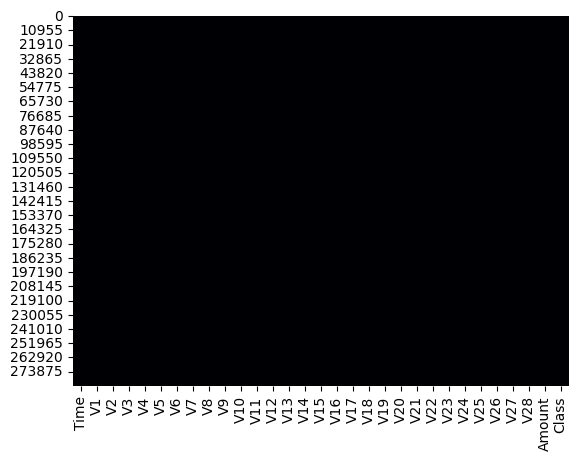

In [7]:
sns.heatmap(data=data.isnull(), cmap='magma', cbar=False) ## cmap and cbar can be removed

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Distribution of Features :

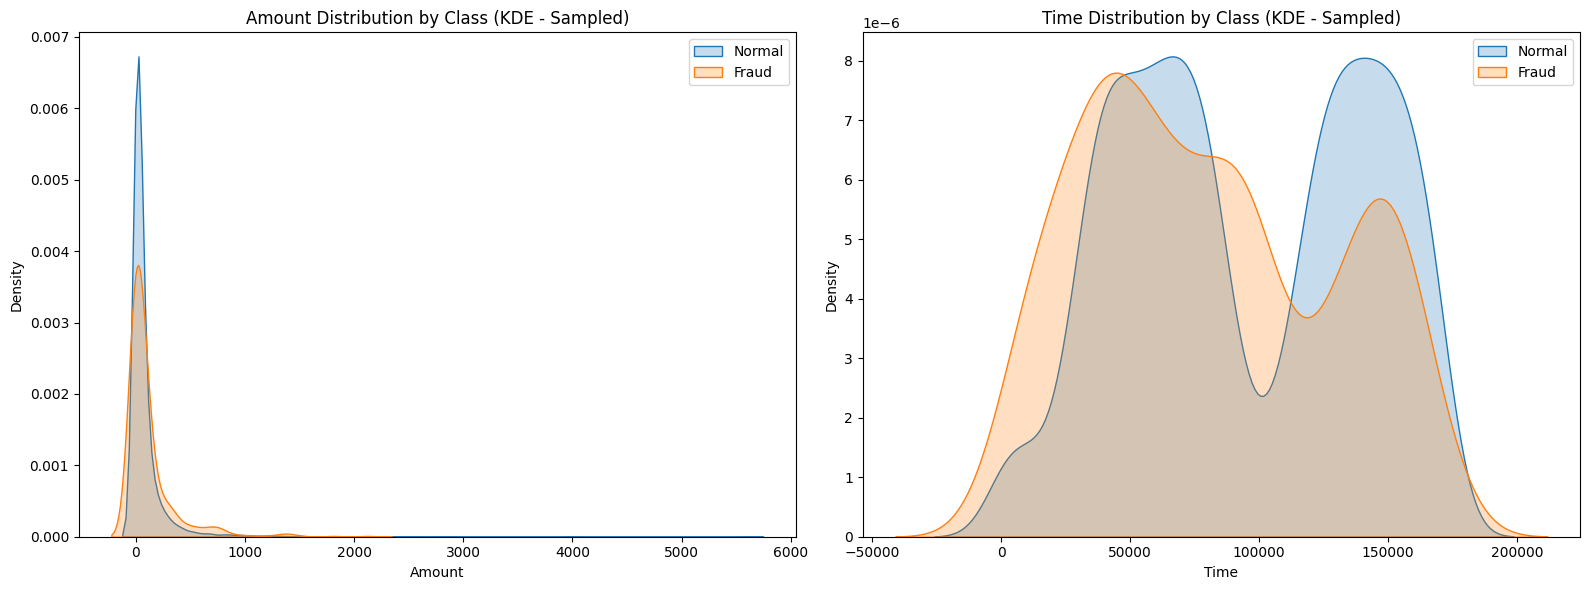

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate fraud and normal
fraud = data[data['Class'] == 1]
normal_sample = data[data['Class'] == 0].sample(n=len(fraud)*10, random_state=42)  # 10x normal to fraud ratio
sampled = pd.concat([fraud, normal_sample])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot for Amount
sns.kdeplot(data=sampled[sampled['Class'] == 0], x='Amount', label='Normal', ax=axes[0], fill=True)
sns.kdeplot(data=sampled[sampled['Class'] == 1], x='Amount', label='Fraud', ax=axes[0], fill=True)
axes[0].set_title('Amount Distribution by Class (KDE - Sampled)')
axes[0].legend()

# KDE plot for Time
sns.kdeplot(data=sampled[sampled['Class'] == 0], x='Time', label='Normal', ax=axes[1], fill=True)
sns.kdeplot(data=sampled[sampled['Class'] == 1], x='Time', label='Fraud', ax=axes[1], fill=True)
axes[1].set_title('Time Distribution by Class (KDE - Sampled)')
axes[1].legend()

plt.tight_layout()
plt.show()


In [10]:
zero_amounts = data[data['Amount'] == 0]
print(zero_amounts['Class'].value_counts())


Class
0    1798
1      27
Name: count, dtype: int64


In [11]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['blue', 'green', 'red', 'orange', 'purple']

col = list(data.columns)
col.remove('Class')
categorical_features = ['Class']
numerical_features = [*col]
n = len(numerical_features)
cols = 2  # fewer columns for bigger plots
rows = math.ceil(n / cols)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Class
Numerical Features : Time V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 Amount


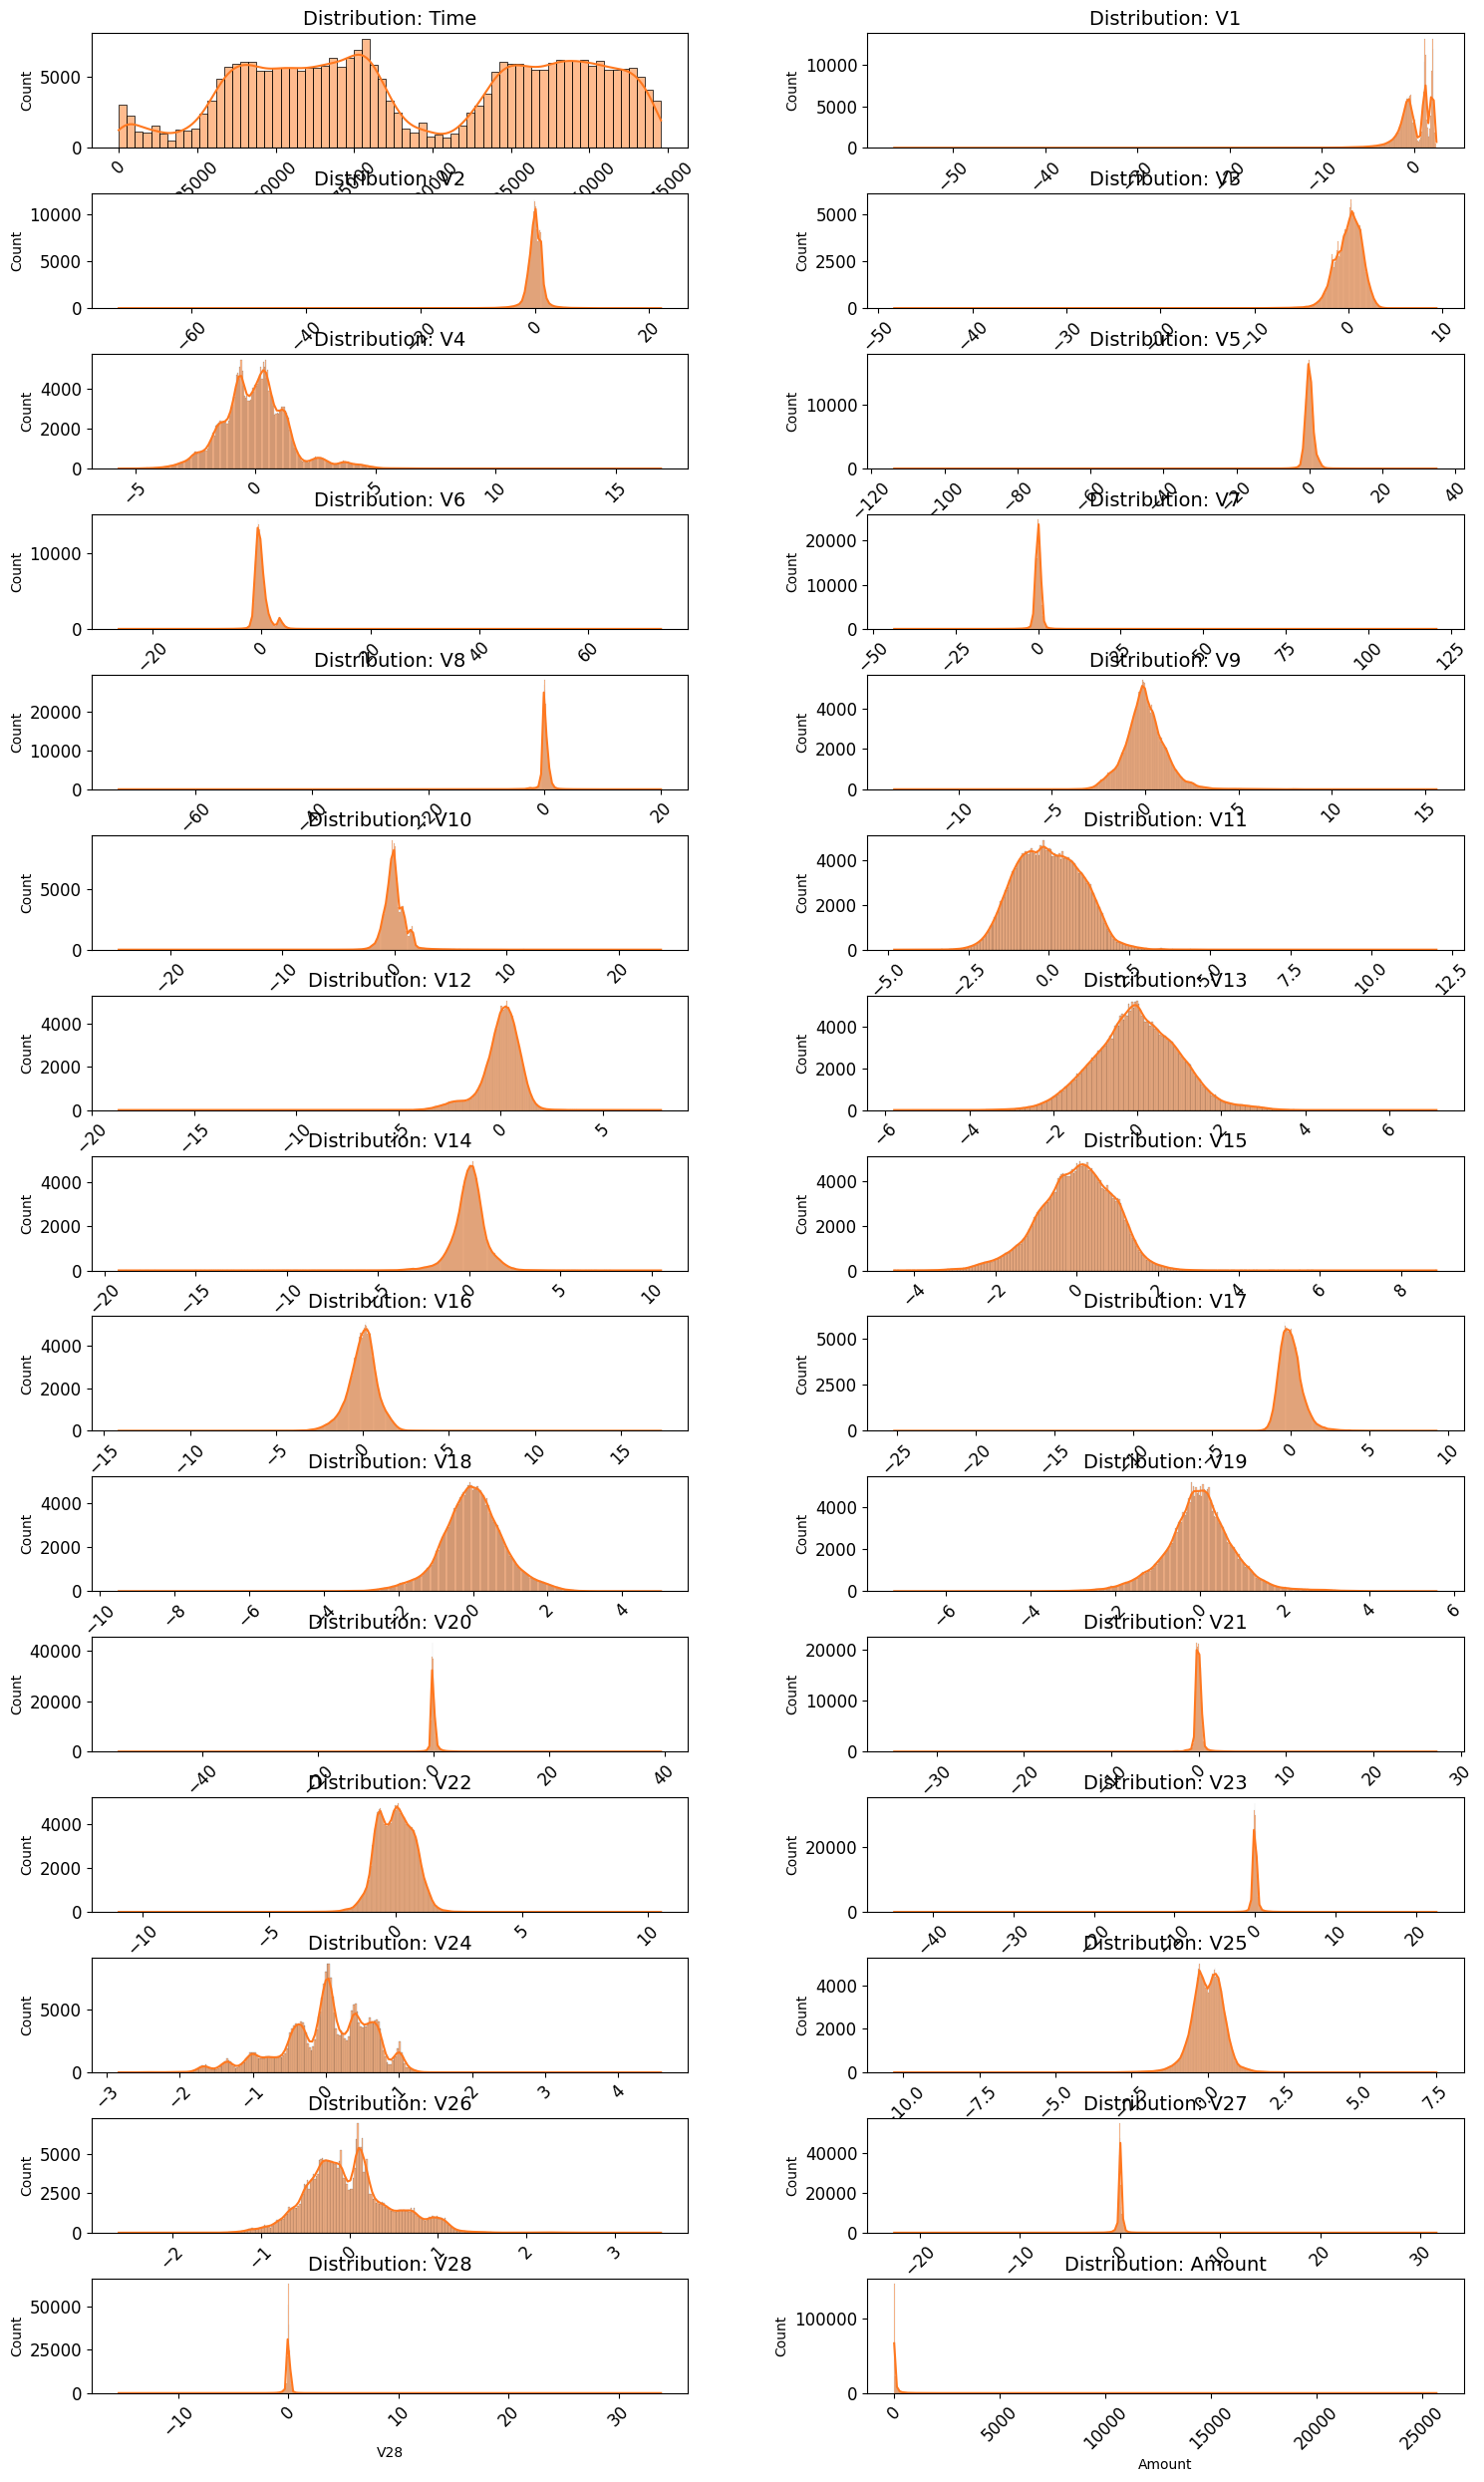

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(8 * cols, 6 * rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], color=colors[0], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution: {feature}', fontsize=14)
    axes[i].tick_params(axis='both', which='major', labelsize=12)
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


In [13]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
corr_with_class = data.corr()['Class'].sort_values(ascending=False)
print(corr_with_class)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


### Data Scaling :

In [15]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Class']

mms = MinMaxScaler()
data_scaled = data.copy()
data_scaled[numerical_features] = mms.fit_transform(data[numerical_features])
data_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


### Principal Component Analysis (PCA) :


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(data_scaled[numerical_features])
principal_components

array([[-0.5510804 ,  0.00680346, -0.03455715, ..., -0.01400654,
         0.02593552, -0.0080894 ],
       [-0.55496355, -0.04939377,  0.01061962, ...,  0.04563963,
        -0.03034039,  0.01553095],
       [-0.55913964, -0.09698212, -0.03603226, ...,  0.00756717,
         0.04495668, -0.00495983],
       ...,
       [ 0.44657411,  0.08768482, -0.01062048, ..., -0.01270928,
         0.00449441,  0.02400188],
       [ 0.45096804,  0.01816019,  0.0966717 , ..., -0.04334026,
         0.03190819,  0.00337271],
       [ 0.45560855,  0.0046037 , -0.12740342, ..., -0.00835429,
         0.02708792, -0.00525871]], shape=(284807, 13))

# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Modeling</div></center>


In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# 1. Keep PCA features
X_pca = principal_components

# 2. Train Isolation Forest
iso = IsolationForest(
    contamination=0.001,   # Adjust if you expect a different % of anomalies
    random_state=42
)
y_pred = iso.fit_predict(X_pca)


In [ ]:
# 3. Convert predictions: 1 → normal, -1 → anomaly
y_pred = [1 if p == -1 else 0 for p in y_pred]  # 1 = fraud/anomaly, 0 = normal

[[284152    163]
 [   370    122]]


In [30]:
# 4. If you have ground truth labels, compare
print(confusion_matrix(data['Class'], y_pred))

[[284152    163]
 [   370    122]]


In [26]:
print(classification_report(data['Class'], y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.43      0.25      0.31       492

    accuracy                           1.00    284807
   macro avg       0.71      0.62      0.66    284807
weighted avg       1.00      1.00      1.00    284807



# <center><div style="font-family: Trebuchet MS; background-color: #FF781F; color: #2D2926; padding: 12px; line-height: 1;">Insights on Detected Anomalies</div></center>


### Transaction Classes

•   Class 0 → Normal (non-fraudulent) transactions.

•   Class 1 → Fraudulent transactions.

### Model Performance Overview

•The dataset is highly imbalanced:

284,315 normal transactions (~99.83%)

492 fraudulent transactions (~0.17%)

Accuracy is extremely high (~1.00) due to imbalance, but precision and recall for fraudulent transactions are lower, showing that the model struggles to catch all fraud cases without false positives.

### Flagged Transactions

•The model flagged a small subset of transactions as potential fraud (Class 1).

•Fraudulent transactions are extremely rare and often have unusual spending patterns, which the model detects as anomalies.

### Observed Patterns in Anomalies

•Fraudulent transactions generally have unusual values in certain principal components derived from PCA, indicating they differ significantly from the bulk of the transaction distribution.

•Detected anomalies often cluster away from the majority of transactions in PCA-transformed space.

•Despite detection, the recall of 0.25 means the model only identified about 25% of actual fraud cases, suggesting further tuning or use of more specialized anomaly detection methods could improve detection.
